In [1]:
#Regressor
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt;

df = pd.read_csv(r"C:\Users\Raider\Downloads\airfoil.csv");
df

,x1,x2,x3,x4,x5,y
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [2]:
X = df.drop(['y'], axis = 1)
Y = df.y

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [3]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Predicted values for test data:", y_pred)
print("Score for training data:", model.score(x_train,y_train))
print("Score for test data:", model.score(x_test,y_test))

Predicted values for test data: [134.563 117.465 110.447 115.846 129.285 123.565 117.309 124.156 116.295
 123.807 127.095 132.184 127.947 116.559 126.959 113.288 129.038 134.227
 115.304 116.066 120.92  131.234 128.536 134.247 130.541 120.532 113.034
 139.918 130.049 130.507 127.251 125.268 104.13  126.826 129.88  127.71
 115.659 112.768 125.741 130.746 132.095 125.114 135.324 121.657 111.959
 134.152 126.201 129.953 127.638 129.099 124.717 123.865 119.375 127.315
 121.627 121.762 117.087 131.636 121.431 119.174 129.256 133.294 125.347
 134.236 126.644 124.077 128.244 131.966 130.777 112.506 129.308 125.951
 121.617 132.43  124.214 122.397 123.965 128.867 133.756 129.953 131.074
 131.186 118.955 123.037 129.964 118.743 128.595 122.724 133.846 124.346
 131.889 123.991 118.005 113.129 128.179 108.034 108.689 135.803 119.099
 122.765 123.41  135.49  130.217 130.688 135.227 130.94  132.086 129.395
 131.015 134.568 134.247 124.426 125.824 126.616 129.099 121.397 131.615
 120.786 129.099 128

In [4]:
#Classifier
df = pd.read_csv(r"C:\Users\Raider\Downloads\iris.csv");
df.variety = df.variety.replace({"Setosa":1,"Versicolor":2,"Virginica":3})

X = df.drop(['variety'], axis = 1)
Y = df.variety

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Predicted values for test data:", y_pred)
print("Score for training data:", model.score(x_train,y_train))
print("Score for test data:", model.score(x_test,y_test))

Predicted values for test data: [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2]
Score for training data: 1.0
Score for test data: 1.0


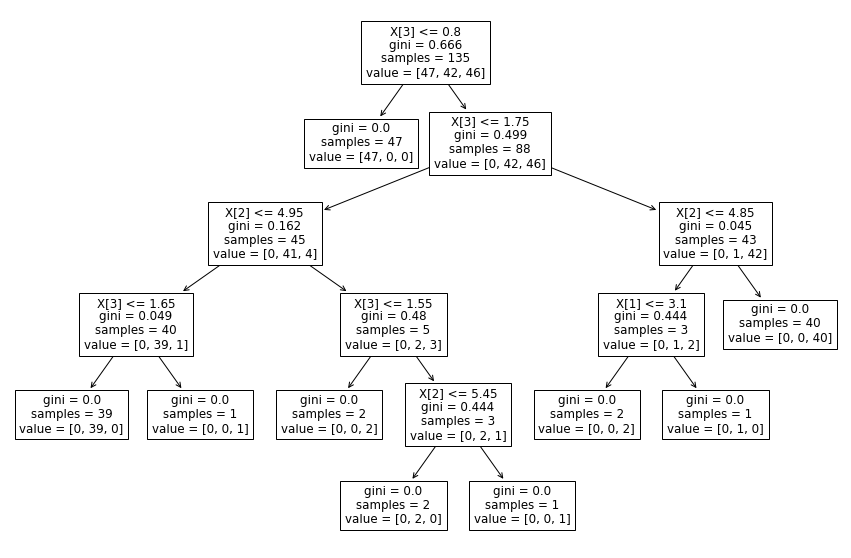

In [6]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

In [7]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Predicted values for test data:", y_pred)
print("Score for training data:", model.score(x_train,y_train))
print("Score for test data:", model.score(x_test,y_test))

Predicted values for test data: [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2]
Score for training data: 0.9703703703703703
Score for test data: 1.0


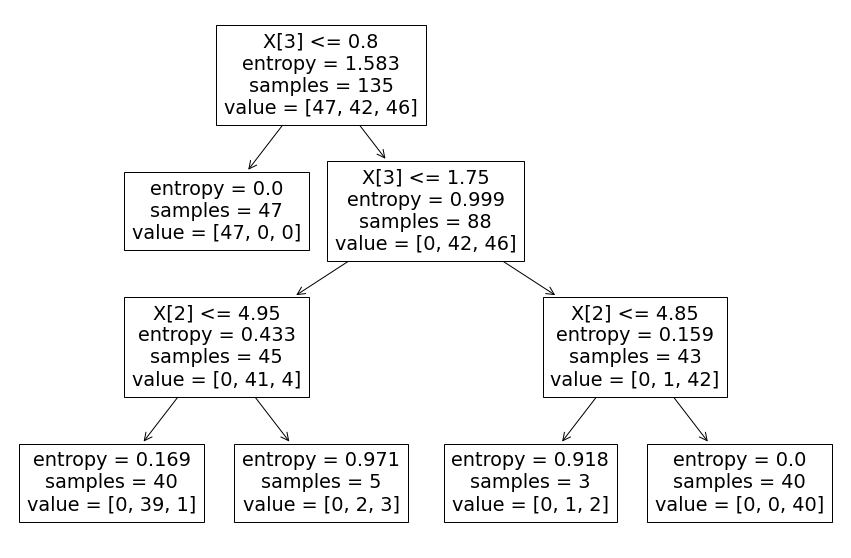

In [8]:
plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

Alpha:  0.0
Impurities 0.1063413165503972
Score for training data: 1.0
Score for test data: 1.0


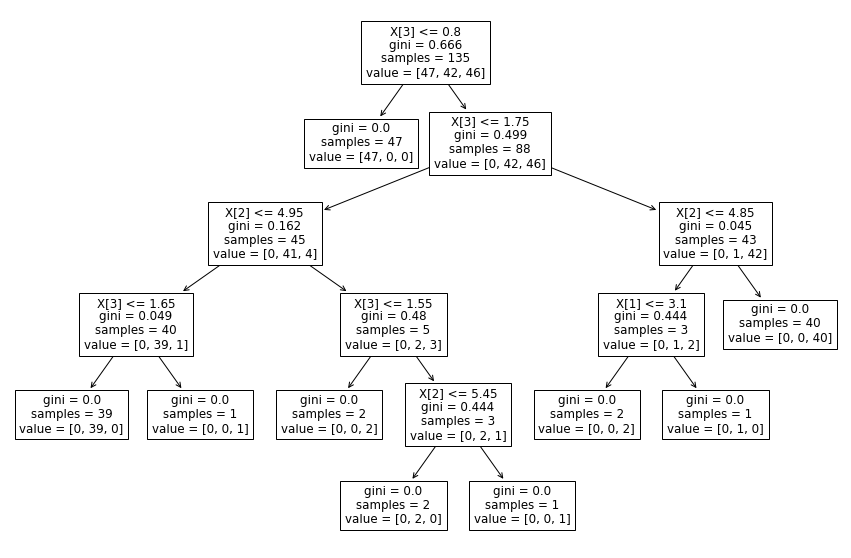

Alpha:  0.030349371802361576
Impurities 0.13669068835275877
Score for training data: 0.9629629629629629
Score for test data: 0.9333333333333333


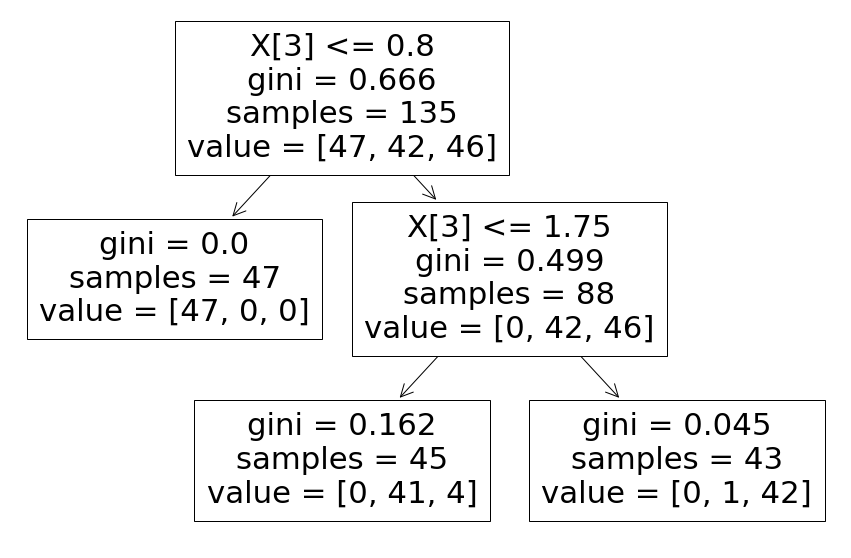

Alpha:  0.05831531046928727
Impurities 0.19500599882204606
Score for training data: 0.9629629629629629
Score for test data: 0.9333333333333333


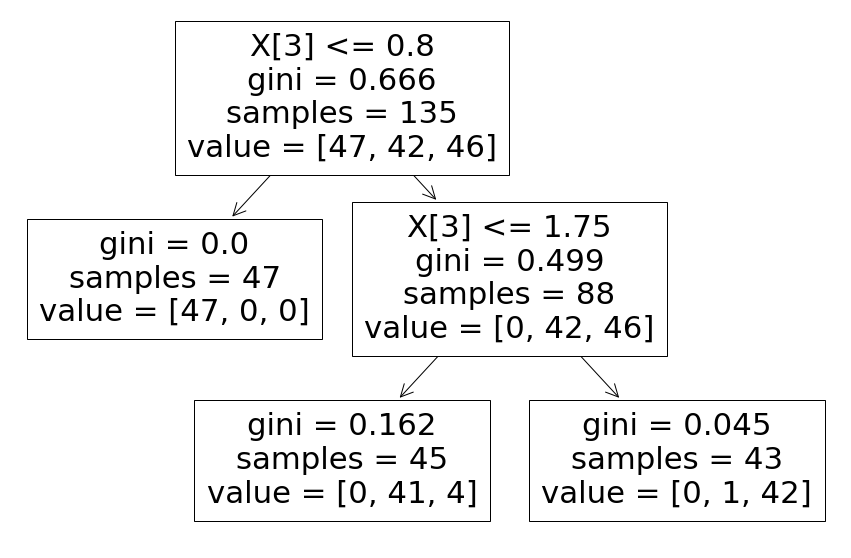

Alpha:  0.4558740063983364
Impurities 0.6508800052203825
Score for training data: 0.34814814814814815
Score for test data: 0.2


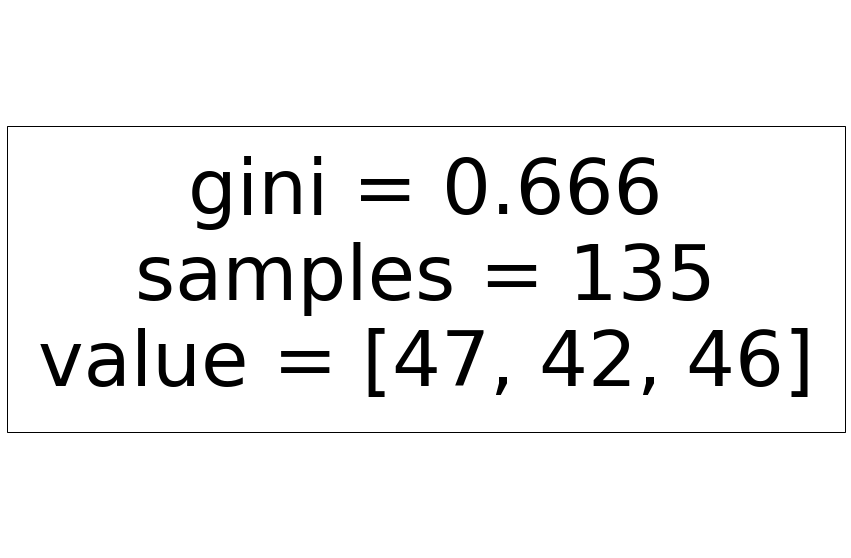

Alpha:  0.9324033120957858
Impurities 1.5832833173161682
Score for training data: 0.34814814814814815
Score for test data: 0.2


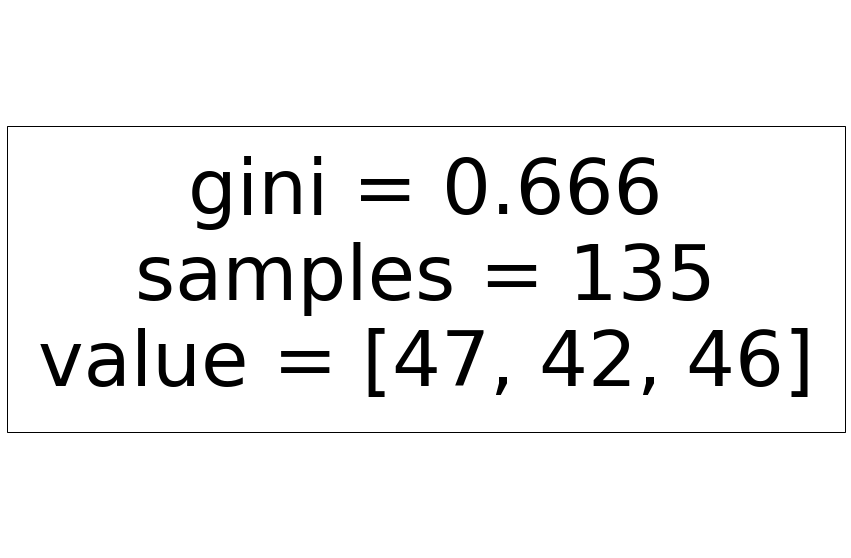

In [9]:
path = model.cost_complexity_pruning_path(x_train, y_train)
clfs = []
i = 0
for ccp_alpha in path.ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    print("Alpha: ", ccp_alpha)
    print("Impurities", path.impurities[i])
    print("Score for training data:", clf.score(x_train,y_train))
    print("Score for test data:", clf.score(x_test,y_test))
    plt.figure(figsize=(15,10))
    tree.plot_tree(clf)
    plt.show()
    i+=1

Text(0, 0.5, 'Impurity')

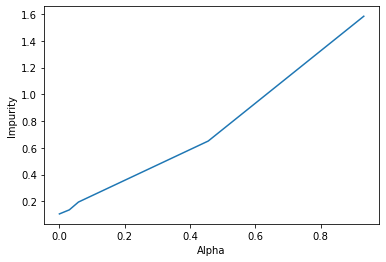

In [10]:
plt.plot(path.ccp_alphas, path.impurities)
plt.xlabel('Alpha')
plt.ylabel('Impurity')